In [10]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
features=[  2   ,5,   3 , 37,   6 ,  7,   0 ,  8 , 59 ,  9,  10,  11 , 12 , 13 ,  1 , 44 , 42,  60,
  46  ,21 , 78,  45 , 80,  82 , 84 , 86 , 88 , 90 , 92,  23 , 71,  41, 110,  40, 108,  39,
  62, 106,  38 ,109]

prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "1Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    stock.get(string)
    price = stock
    print(price.iloc[:,features])
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price.iloc[:,features])

/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 21:30:00  149.1700    149.26400  149.2640  149.281333   149.264000   
2017-07-18 21:45:00  148.7200    149.18200  149.1000  149.073333   149.182000   
2017-07-18 22:00:00  148.8200    148.97500  148.8500  148.983333   149.071333   
2017-07-18 22:15:00  148.6700    148.94500  149.0400  148.940000   149.063500   
2017-07-18 22:30:00  149.0000    149.14000  149.2400  149.166667   149.057500   
2017-07-18 22:45:00  148.7300    149.00000  148.7600  148.943333   148.972500   
2017-07-18 23:00:00  148.7000    148.99500  149.2300  149.076433   149.067500   
2017-07-18 23:15:00  149.0200    149.13000  149.0300  149.110000   149.065000   
2017-07-18 23:30:00  149.0100    149.09000  149.1500  149.123333   149.042500   
2017-07-18 23:45:00  149.1600    149.23250  149.3150  149.315000   149.181250   
2017-07-19 00:00:00  149.2224    149.29750  149.2800  149.284133   149.193750   
2017-07-19 00:15:00  149.100

                           low  close_2_sma      close       middle  \
2017-07-18 21:30:00  1006.0000   1006.03000  1006.0300  1006.020000   
2017-07-18 21:45:00  1004.0000   1007.55500  1009.0800  1007.536667   
2017-07-18 22:00:00  1009.3100   1010.69750  1012.3150  1011.761667   
2017-07-18 22:15:00  1010.5500   1012.58250  1012.8500  1012.696667   
2017-07-18 22:30:00  1012.6200   1013.85000  1014.8500  1014.146667   
2017-07-18 22:45:00  1011.4400   1013.28000  1011.7100  1012.880000   
2017-07-18 23:00:00  1011.5200   1013.60000  1015.4900  1014.230000   
2017-07-18 23:15:00  1014.9500   1015.73500  1015.9800  1015.976667   
2017-07-18 23:30:00  1015.7300   1016.47750  1016.9750  1016.738333   
2017-07-18 23:45:00  1017.1900   1018.49250  1020.0100  1019.346667   
2017-07-19 00:00:00  1019.6101   1021.24500  1022.4800  1021.680033   
2017-07-19 00:15:00  1022.0800   1022.52595  1022.5719  1022.883967   
2017-07-19 00:30:00  1020.7600   1022.81885  1023.0658  1022.351900   
2017-0

                           low  close_2_sma      close       middle  \
2017-07-18 21:30:00   973.3600    974.84500   974.8450   974.395000   
2017-07-18 21:45:00   972.0400    974.74500   974.6450   974.555000   
2017-07-18 22:00:00   974.9000    976.91250   979.1800   978.346667   
2017-07-18 22:15:00   976.4200    978.62000   978.0600   978.276667   
2017-07-18 22:30:00   977.5100    978.37000   978.6800   978.446667   
2017-07-18 22:45:00   977.2200    977.97000   977.2600   978.076667   
2017-07-18 23:00:00   977.4200    979.35500   981.4500   980.170000   
2017-07-18 23:15:00   980.8500    981.81000   982.1700   981.920000   
2017-07-18 23:30:00   982.2700    982.60000   983.0300   982.876667   
2017-07-18 23:45:00   982.5700    983.66000   984.2900   983.816667   
2017-07-19 00:00:00   983.6601    984.38500   984.4800   984.363367   
2017-07-19 00:15:00   984.3100    984.71000   984.9400   985.063333   
2017-07-19 00:30:00   984.6500    985.20000   985.4600   985.516633   
2017-0

                        low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 21:30:00  73.090     73.11500  73.1150  73.108333    73.115000   
2017-07-18 21:45:00  72.850     73.07000  73.0250  73.018333    73.070000   
2017-07-18 22:00:00  73.022     73.12250  73.2200  73.210667    73.120000   
2017-07-18 22:15:00  73.020     73.17000  73.1200  73.130000    73.120000   
2017-07-18 22:30:00  73.060     73.11500  73.1100  73.110000    73.118750   
2017-07-18 22:45:00  72.950     73.04000  72.9700  73.040000    73.105000   
2017-07-18 23:00:00  72.960     73.07500  73.1800  73.115000    73.095000   
2017-07-18 23:15:00  73.000     73.09500  73.0100  73.070000    73.067500   
2017-07-18 23:30:00  72.860     72.96250  72.9150  72.945000    73.018750   
2017-07-18 23:45:00  72.910     72.94975  72.9845  72.981500    73.022375   
2017-07-19 00:00:00  72.880     72.93980  72.8951  72.921700    72.951150   
2017-07-19 00:15:00  72.770     72.83255  72.7700  72.820000    72.891150   

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 21:30:00  159.6600    159.95500  159.9550  159.871667   159.955000   
2017-07-18 21:45:00  159.4200    160.05500  160.1550  159.938333   160.055000   
2017-07-18 22:00:00  160.1600    160.46750  160.7800  160.616667   160.296667   
2017-07-18 22:15:00  160.0500    160.79500  160.8100  160.596667   160.425000   
2017-07-18 22:30:00  160.8200    160.99000  161.1700  161.090000   160.728750   
2017-07-18 22:45:00  160.7500    160.97750  160.7850  160.905000   160.886250   
2017-07-18 23:00:00  160.7490    161.04250  161.3000  161.149667   161.016250   
2017-07-18 23:15:00  161.0700    161.30500  161.3100  161.293333   161.141250   
2017-07-18 23:30:00  161.2800    161.42305  161.5361  161.488700   161.232775   
2017-07-18 23:45:00  161.3482    161.55805  161.5800  161.536067   161.431525   
2017-07-19 00:00:00  161.5300    161.73500  161.8900  161.783333   161.579025   
2017-07-19 00:15:00  161.630

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 21:30:00  34.3600     34.37000  34.3700  34.386667    34.370000   
2017-07-18 21:45:00  34.2500     34.36500  34.3600  34.343333    34.365000   
2017-07-18 22:00:00  34.3500     34.41000  34.4600  34.430000    34.396667   
2017-07-18 22:15:00  34.4400     34.51500  34.5700  34.530000    34.440000   
2017-07-18 22:30:00  34.5000     34.54750  34.5250  34.531667    34.478750   
2017-07-18 22:45:00  34.4000     34.46250  34.4000  34.443333    34.488750   
2017-07-18 23:00:00  34.3800     34.43050  34.4610  34.440333    34.489000   
2017-07-18 23:15:00  34.4200     34.44635  34.4317  34.440567    34.454425   
2017-07-18 23:30:00  34.4300     34.46085  34.4900  34.480000    34.445675   
2017-07-18 23:45:00  34.4900     34.49250  34.4950  34.501667    34.469425   
2017-07-19 00:00:00  34.4700     34.49000  34.4850  34.501667    34.475425   
2017-07-19 00:15:00  34.4400     34.46750  34.4500  34.463333   

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 21:30:00  31.3700     31.42000  31.4200  31.403333    31.420000   
2017-07-18 21:45:00  31.2000     31.31250  31.2050  31.275000    31.312500   
2017-07-18 22:00:00  31.1700     31.26750  31.3300  31.281667    31.318333   
2017-07-18 22:15:00  31.2900     31.34750  31.3650  31.345000    31.330000   
2017-07-18 22:30:00  31.3100     31.34245  31.3199  31.336633    31.304975   
2017-07-18 22:45:00  31.2300     31.28495  31.2500  31.266667    31.316225   
2017-07-18 23:00:00  31.2400     31.30000  31.3500  31.320000    31.321225   
2017-07-18 23:15:00  31.2830     31.32450  31.2990  31.314000    31.304725   
2017-07-18 23:30:00  31.2800     31.29700  31.2950  31.305000    31.298500   
2017-07-18 23:45:00  31.2900     31.31245  31.3299  31.326633    31.318475   
2017-07-19 00:00:00  31.3200     31.32995  31.3300  31.343333    31.313475   
2017-07-19 00:15:00  31.3300     31.33855  31.3471  31.355700   

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 21:30:00  39.1400     39.16000  39.1600  39.200000    39.160000   
2017-07-18 21:45:00  38.8000     39.07000  38.9800  38.993333    39.070000   
2017-07-18 22:00:00  38.9250     38.99000  39.0000  38.978333    39.046667   
2017-07-18 22:15:00  38.9350     39.02500  39.0500  39.011667    39.047500   
2017-07-18 22:30:00  38.9800     39.09000  39.1300  39.080000    39.040000   
2017-07-18 22:45:00  39.0300     39.09000  39.0500  39.083333    39.057500   
2017-07-18 23:00:00  38.9400     39.09000  39.1300  39.066667    39.090000   
2017-07-18 23:15:00  39.1100     39.15000  39.1700  39.156667    39.120000   
2017-07-18 23:30:00  39.1500     39.19000  39.2100  39.200000    39.140000   
2017-07-18 23:45:00  39.1700     39.20500  39.2000  39.221667    39.177500   
2017-07-19 00:00:00  39.1350     39.17500  39.1500  39.161667    39.182500   
2017-07-19 00:15:00  39.1400     39.15500  39.1600  39.166667   

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 21:30:00  161.7800    161.78000  161.7800  161.853333   161.780000   
2017-07-18 21:45:00  161.3000    162.59000  163.4000  162.733333   162.590000   
2017-07-18 22:00:00  163.3100    163.93500  164.4700  164.220000   163.216667   
2017-07-18 22:15:00  163.9200    164.94000  165.4100  164.943333   163.765000   
2017-07-18 22:30:00  165.0600    165.47500  165.5400  165.500000   164.705000   
2017-07-18 22:45:00  164.5787    165.09000  164.6400  164.969567   165.015000   
2017-07-18 23:00:00  164.5300    165.16000  165.6800  165.396667   165.317500   
2017-07-18 23:15:00  165.1500    165.53500  165.3900  165.446667   165.312500   
2017-07-18 23:30:00  165.1900    165.77000  166.1500  165.930000   165.465000   
2017-07-18 23:45:00  165.6000    165.92500  165.7000  165.906667   165.730000   
2017-07-19 00:00:00  164.6800    165.36000  165.0200  165.149967   165.565000   
2017-07-19 00:15:00  164.810

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 21:30:00  176.0600    176.12500  176.1250  176.118333   176.125000   
2017-07-18 21:45:00  174.2400    176.21250  176.3000  175.993333   176.212500   
2017-07-18 22:00:00  175.2400    176.31500  176.3300  176.316667   176.251667   
2017-07-18 22:15:00  176.0808    177.28995  178.2499  177.543567   176.751225   
2017-07-18 22:30:00  177.7000    178.54495  178.8400  178.480000   177.429975   
2017-07-18 22:45:00  178.1000    178.82050  178.8010  178.683667   178.055225   
2017-07-18 23:00:00  178.6200    179.61050  180.4200  179.893333   179.077725   
2017-07-18 23:15:00  180.2100    180.89325  181.3665  181.022167   179.856875   
2017-07-18 23:30:00  180.8200    181.92325  182.4800  182.050600   180.766875   
2017-07-18 23:45:00  182.4500    182.82950  183.1790  183.106333   181.861375   
2017-07-19 00:00:00  182.8500    183.74975  184.3205  183.886833   182.836500   
2017-07-19 00:15:00  183.650

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 21:30:00  146.0100    146.43000  146.4300  146.303333   146.430000   
2017-07-18 21:45:00  145.3700    146.27250  146.1150  145.971567   146.272500   
2017-07-18 22:00:00  146.1490    146.16750  146.2200  146.314667   146.255000   
2017-07-18 22:15:00  146.0300    146.27500  146.3300  146.296667   146.273750   
2017-07-18 22:30:00  146.3000    146.47000  146.6100  146.538333   146.318750   
2017-07-18 22:45:00  146.3700    146.59000  146.5700  146.536667   146.432500   
2017-07-18 23:00:00  146.5570    146.79500  147.0200  146.869000   146.632500   
2017-07-18 23:15:00  146.6800    146.89000  146.7600  146.810000   146.740000   
2017-07-18 23:30:00  146.6800    146.81500  146.8700  146.847867   146.805000   
2017-07-18 23:45:00  146.6500    146.76000  146.6500  146.800000   146.825000   
2017-07-19 00:00:00  146.6000    146.76000  146.8700  146.800000   146.787500   
2017-07-19 00:15:00  146.880

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 21:30:00  176.6400    176.70000  176.7000  176.826667   176.700000   
2017-07-18 21:45:00  176.3100    176.61000  176.5200  176.741667   176.610000   
2017-07-18 22:00:00  176.3375    176.52500  176.5300  176.592500   176.583333   
2017-07-18 22:15:00  176.2500    176.67000  176.8100  176.683333   176.640000   
2017-07-18 22:30:00  176.7000    176.96250  177.1150  177.013333   176.743750   
2017-07-18 22:45:00  176.2600    176.72750  176.3400  176.593333   176.698750   
2017-07-18 23:00:00  176.2800    176.75500  177.1700  176.873333   176.858750   
2017-07-18 23:15:00  177.0000    177.26000  177.3500  177.233333   176.993750   
2017-07-18 23:30:00  176.7800    177.17500  177.0000  177.040000   176.965000   
2017-07-18 23:45:00  176.9400    177.13000  177.2600  177.176667   177.195000   
2017-07-19 00:00:00  177.0600    177.18190  177.1038  177.154600   177.178450   
2017-07-19 00:15:00  176.940

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 21:30:00   81.5000     81.50000   81.5000   81.500000    81.500000   
2017-07-18 21:45:00   81.1500     81.47000   81.4400   81.370000    81.470000   
2017-07-18 22:00:00   81.3500     81.44500   81.4500   81.426667    81.463333   
2017-07-18 22:15:00   81.3700     81.56750   81.6850   81.598333    81.518750   
2017-07-18 22:30:00   81.6400     81.71750   81.7500   81.720000    81.581250   
2017-07-18 22:45:00   81.4500     81.61500   81.4800   81.563333    81.591250   
2017-07-18 23:00:00   81.4600     81.64000   81.8000   81.690000    81.678750   
2017-07-18 23:15:00   81.6400     81.73000   81.6600   81.700000    81.672500   
2017-07-18 23:30:00   81.6200     81.70000   81.7400   81.721667    81.670000   
2017-07-18 23:45:00   81.7450     81.75500   81.7700   81.798333    81.742500   
2017-07-19 00:00:00   81.7200     81.76000   81.7500   81.785000    81.730000   
2017-07-19 00:15:00   81.630

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 21:30:00  247.1500    247.17090  247.1709  247.280300   247.170900   
2017-07-18 21:45:00  246.0600    247.34795  247.5250  247.195000   247.347950   
2017-07-18 22:00:00  247.1000    247.46250  247.4000  247.466667   247.365300   
2017-07-18 22:15:00  247.1200    247.39950  247.3990  247.406333   247.373725   
2017-07-18 22:30:00  247.3200    247.63450  247.8700  247.740000   247.548500   
2017-07-18 22:45:00  247.2576    247.58000  247.2900  247.505867   247.489750   
2017-07-18 23:00:00  247.2700    248.12250  248.9550  248.408333   247.878500   
2017-07-18 23:15:00  248.4300    248.81750  248.6800  248.706667   248.198750   
2017-07-18 23:30:00  248.6400    249.01500  249.3500  249.173333   248.568750   
2017-07-18 23:45:00  249.3700    249.51500  249.6800  249.640000   249.166250   
2017-07-19 00:00:00  249.6100    249.80500  249.9300  249.863333   249.410000   
2017-07-19 00:15:00  249.890

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 21:30:00  57.5000     57.53000  57.5300  57.543333    57.530000   
2017-07-18 21:45:00  57.3100     57.69000  57.8500  57.680000    57.690000   
2017-07-18 22:00:00  57.7100     57.81500  57.7800  57.800000    57.720000   
2017-07-18 22:15:00  57.7700     57.91500  58.0500  57.990000    57.802500   
2017-07-18 22:30:00  57.9600     58.03000  58.0100  58.006400    57.922500   
2017-07-18 22:45:00  57.8800     57.96145  57.9129  57.967633    57.938225   
2017-07-18 23:00:00  57.9040     58.06145  58.2100  58.111333    58.045725   
2017-07-18 23:15:00  57.9953     58.10265  57.9953  58.069100    58.032050   
2017-07-18 23:30:00  57.9600     57.97765  57.9600  58.006667    58.019550   
2017-07-18 23:45:00  57.9700     58.07500  58.1900  58.126667    58.088825   
2017-07-19 00:00:00  58.1500     58.27000  58.3500  58.283333    58.123825   
2017-07-19 00:15:00  58.2100     58.31500  58.2800  58.310000   

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 21:30:00  71.2300     71.31000  71.3100  71.350000    71.310000   
2017-07-18 21:45:00  70.8400     71.08500  70.8600  71.046667    71.085000   
2017-07-18 22:00:00  70.7200     70.94000  71.0200  70.926667    71.063333   
2017-07-18 22:15:00  70.8500     71.11500  71.2100  71.101667    71.100000   
2017-07-18 22:30:00  71.1600     71.25500  71.3000  71.256667    71.097500   
2017-07-18 22:45:00  70.9500     71.13000  70.9600  71.070000    71.122500   
2017-07-18 23:00:00  70.9300     71.06000  71.1600  71.083333    71.157500   
2017-07-18 23:15:00  71.1000     71.14500  71.1300  71.133333    71.137500   
2017-07-18 23:30:00  71.0900     71.12500  71.1200  71.126667    71.092500   
2017-07-18 23:45:00  71.0900     71.15735  71.1947  71.188233    71.151175   
2017-07-19 00:00:00  71.0700     71.17735  71.1600  71.156667    71.151175   
2017-07-19 00:15:00  71.0436     71.13000  71.1000  71.107867   

                          low  close_2_sma     close      middle  close_4_sma  \
2017-07-18 21:30:00  152.6100    152.61000  152.6100  152.610000   152.610000   
2017-07-18 21:45:00  152.1600    152.46500  152.3200  152.440000   152.465000   
2017-07-18 22:00:00  151.9200    152.31500  152.3100  152.200000   152.413333   
2017-07-18 22:15:00  152.2200    152.32500  152.3400  152.336667   152.395000   
2017-07-18 22:30:00  152.2100    152.30000  152.2600  152.273333   152.307500   
2017-07-18 22:45:00  151.0000    151.86000  151.4600  151.580300   152.092500   
2017-07-18 23:00:00  151.4500    151.53500  151.6100  151.626667   151.917500   
2017-07-18 23:15:00  151.4200    151.56500  151.5200  151.526667   151.712500   
2017-07-18 23:30:00  151.3000    151.54000  151.5600  151.475000   151.537500   
2017-07-18 23:45:00  151.3800    151.52720  151.4944  151.502067   151.546100   
2017-07-19 00:00:00  151.2700    151.49720  151.5000  151.436667   151.518600   
2017-07-19 00:15:00  151.280

                         low  close_2_sma    close     middle  close_4_sma  \
2017-07-18 21:30:00  56.2600     56.34170  56.3417  56.314467    56.341700   
2017-07-18 21:45:00  56.1700     56.26795  56.1942  56.248067    56.267950   
2017-07-18 22:00:00  56.0738     56.16960  56.1450  56.146267    56.226967   
2017-07-18 22:15:00  56.0800     56.22250  56.3000  56.226667    56.245225   
2017-07-18 22:30:00  56.2100     56.25500  56.2100  56.240000    56.212300   
2017-07-18 22:45:00  56.0200     56.13000  56.0500  56.100000    56.176250   
2017-07-18 23:00:00  56.0300     56.12500  56.2000  56.143333    56.190000   
2017-07-18 23:15:00  56.0700     56.13500  56.0700  56.113333    56.132500   
2017-07-18 23:30:00  56.0400     56.06250  56.0550  56.068333    56.093750   
2017-07-18 23:45:00  56.0550     56.10750  56.1600  56.125000    56.121250   
2017-07-19 00:00:00  56.0800     56.14000  56.1200  56.123333    56.101250   
2017-07-19 00:15:00  56.0950     56.11750  56.1150  56.123333   

In [ ]:
low             145.44
close_4_sma     145.50
close_2_sma     145.50
close           145.50
middle          145.52
close_6_sma     145.50
close_8_sma     145.50
close_12_ema    145.50
open            145.50
close_10_sma    145.50
close_12_sma    145.50
close_14_sma    145.50
close_16_sma    145.50
close_18_sma    145.50
close_20_sma    145.50
boll            145.50
high            145.62
close_26_ema    145.50
boll_lb            NaN
close_-1_s         NaN
Name: 2017-07-13 21:30:00, dtype: float64

In [23]:
def smote1(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def smote(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
    
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                    

In [25]:
o=0



accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
inbalancinglist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    inbalance=[]
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[1,5,25,40,80,115,145,170,200,250,290,320,360,400,450]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
        gspace=[1]
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(C=c)
                    print(sum(y_train))
                    print(len(y_train))
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    
                    maxc=c
                    bestsvm=rbf_svm
        inbalance.append(totu)
        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(C=maxc)
        
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    inbalancinglist.append(inbalance)
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

Working on... AAPL
927
1865


ValueError: No samples will be generated with the provided ratio settings.

In [7]:
tempacc=f1scoreresults
tempbalance=inbalancinglist

[0.36469206 0.37881042 0.46840733 0.50040292 0.52686636 0.52891227
 0.55985112 0.58129527 0.59525726 0.63093754 0.60729847 0.58748464
 0.5726399  0.56444512 0.56536219]
[ 0.          0.          0.          0.          0.          0.
  0.          1.38888889  6.94444444 16.66666667 15.27777778 22.22222222
 25.         26.38888889 30.55555556]


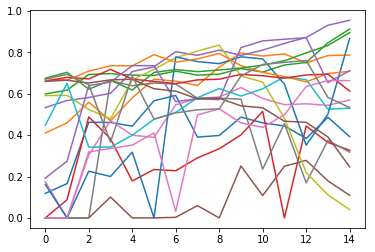

In [8]:
import operator
t=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
b=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    b=np.add(b,tempbalance[i])
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
print(b/len(tempbalance))
plt.show()

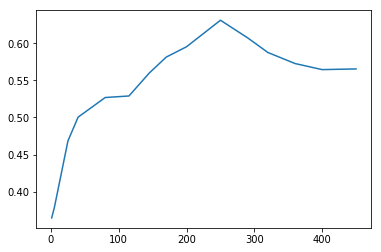

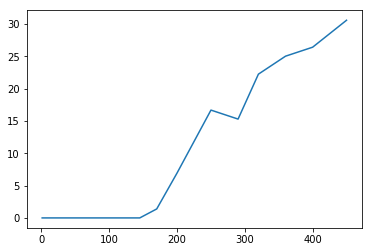

In [9]:
plt.plot(trendwindowtime,t/len(tempacc))
#normalized=normalize((b/len(tempbalance)).reshape(1, -1),axis=0,norm='max')

plt.show()
plt.plot(trendwindowtime,b/len(tempbalance))
plt.show()